In [1]:
import matplotlib.pyplot as plt
import tree_utils as tu
from tqdm import tqdm
import networkx as nx
import numpy as np
import random
from sklearn.preprocessing import normalize

"""
Note:
The frontier is strictly suppposed to be used as edges only. There will be straggling nodes lying around that 
you need to be careful for. 

This is especially important for concatenating graphs. in stead of combining, it is best to place the edges into
a new graph one by one.
"""


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


'\nNote:\nThe frontier is strictly suppposed to be used as edges only. There will be straggling nodes lying around that \nyou need to be careful for. \n\nThis is especially important for concatenating graphs. in stead of combining, it is best to place the edges into\na new graph one by one.\n'

In [11]:
dims = (2, 2)
g = tu.generate_grid_graph(dims, queen=True)

# g = nx.relabel_nodes(g, {node: (dims[0] * node[0]) + node[1] + 1 for node in g.nodes}, copy=False)
# tu.draw(g)

# queen_trees = sample_trees(queen, tu.uniform_random_spanning_tree, 100000)
trees = tu.enumerate_all_trees(g)

ds = [0]
tree_dict = tu.make_tree_dict(trees, ds)
counting_dict = tu.make_counting_dict(g, tree_dict, ds)

16it [00:00, 1826.69it/s]
100%|█████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 129304.17it/s]


In [5]:
def valid_run(snapped_edge, cc1, cc2):
    u, v = snapped_edge
    g = nx.Graph()
    g.add_edge(u, v)
    
    for edge in cc1.edges:
        u, v = edge
        g.add_edge(u, v)
        
    for edge in cc2.edges:
        u, v = edge
        g.add_edge(u, v)
        
    return nx.is_tree(g), g     

def get_ccs(g, counting_dict, snapped_edge):
#     print()
#     print("new")
    
#     u, v = tu.sample_edge_from_counts(counting_dict)
    cc1, cc2, cc1_frontier, cc2_frontier = tu.initialize(g, snapped_edge)
    target_size = len(g.nodes)/2

    while not tu.trees_correct_sizes(cc1, cc2, target_size):
        if tu.is_bottlenecked(cc1, cc1_frontier, target_size):
            tu.break_bottleneck(g, cc1, cc2, snapped_edge, cc1_frontier, cc2_frontier)

        if len(cc1.nodes) != target_size:
            tu.sample_from_frontier_to_cc(g, cc1_frontier, cc1, cc2_frontier, cc2)

        if tu.is_bottlenecked(cc2, cc2_frontier, target_size):
            tu.break_bottleneck(g, cc2, cc1, snapped_edge, cc2_frontier, cc1_frontier)

        if len(cc2.nodes) != target_size:
            tu.sample_from_frontier_to_cc(g, cc2_frontier, cc2, cc1_frontier, cc1)
    
    result, tree = valid_run(snapped_edge, cc1, cc2)
    return tree
    
edge_map = dict()
for i, edge in enumerate(g.edges):
    edge_map[edge] = i
    
tree_counter = dict()

num_runs = 10000
for i in range(num_runs):
    tree = get_ccs(g, counting_dict, (3, 4))
    edge_set = tuple(sorted([edge_map[tuple(sorted(edge))] for edge in tree.edges]))
    if edge_set in tree_counter.keys():
        tree_counter[edge_set] += 1
    else:
        tree_counter[edge_set] = 1


In [ ]:
for k, v in tree_counter.items():
    tree_counter[k] = v/ num_runs

In [6]:
tree_counter

{(1, 2, 3, 4, 5): 7527, (0, 2, 3, 4, 6): 1268, (0, 1, 3, 5, 6): 1205}

In [7]:
edge_map

{(1, 2): 0, (1, 3): 1, (2, 4): 2, (3, 4): 3, (3, 5): 4, (4, 6): 5, (5, 6): 6}

In [8]:
edge_map

{(1, 2): 0, (1, 3): 1, (2, 4): 2, (3, 4): 3, (3, 5): 4, (4, 6): 5, (5, 6): 6}

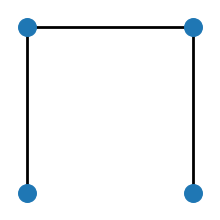

In [12]:
for tree in trees:
    tu.draw(tree)

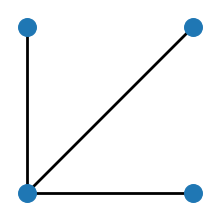

In [15]:
tu.draw(trees[0])

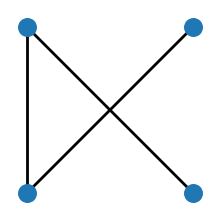

In [16]:
tu.draw(trees[1])